# **---  Predicting the AirTicket Price using Machine Learning ---**

# **Problem Definition :**
* The objective of this project is to build a predictive model that can accurately estimate  the price of airline tickets given specific flight details and other relevant factors

# **Dataset :**
* **Train_Data.xlsx** - We will utilize a dataset containing historical information on airline ticket prices, including features such as departure and arrival locations, departure date and time, flight duration, airline carrier, and other relevant attributes. The dataset will be split into training and testing sets for model development and evaluation, respectively. 

### **Importing the data and preparing it for modelling**

In [2]:
# Import data analysis tools 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_excel(r"Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2024-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2024-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2024-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2024-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2024-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### **Handling missing data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2024-05-06,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### **Data Pre-process and Extract Derived Attributes**

In [9]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Function for Extracting Derived attributes from `Date_of_Journey`
**Extract derived attributes from "Date_of_Journey" & fetch day , month and year**

In [10]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [11]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2024-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2024-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2024-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


### **Ignore Warnings**

In [12]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [13]:
for feature in ['Dep_Time' , 'Arrival_Time']:
    change_into_Datetime(feature)

In [14]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [16]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2024-03-24,Banglore,Delhi,BLR → DEL,2024-04-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2024


## **Function for Extracting Derived attributes from `Dep_Time` And `Arrival Time`**

In [17]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(1)

## **Extract derived attributes from `Dep_Time` and `Arrival_Time` & fetch Hour and Minute**

In [18]:
extract_hour_min(data , "Dep_Time")
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2024-03-24,Banglore,Delhi,BLR → DEL,2024-04-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2024,22,20,1,10


### **Dropping `Arrival_Time` and `Dep_Time` Attributes form Dataset**

In [19]:
cols_to_drop = ['Arrival_Time' , "Dep_Time"]
data.drop(cols_to_drop , axis=1 , inplace=True )

In [20]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2024-03-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2024,22,20,1,10


## **Preprocess duration feature and extract meaningful attributes**

In [21]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [22]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [23]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours

In [24]:
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

In [25]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,2024-03-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2024,22,20,1,10,2,50
1,Air India,2024-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2024,5,50,13,15,7,25
2,Jet Airways,2024-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2024,9,25,4,25,19,0
3,IndiGo,2024-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2024,18,5,23,30,5,25
4,IndiGo,2024-03-01,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2024,16,50,21,35,4,45


In [26]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [27]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute'],
      dtype='object')

### **Drop unnecessary features**

In [28]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Route' , 'Duration' , 'Journey_year'] , axis=1 , inplace=True)

In [29]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


### **Checking Number of Unique Values in Each Attribute**

In [30]:
data['Airline'].nunique()

12

In [31]:
data['Source'].nunique()

5

In [32]:
data['Destination'].nunique()

5

In [33]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute'],
      dtype='object')

In [35]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45


# **Feature Encoding**

### **1. Converting `Total_Stops` Attribute into numeric form**

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
data['Total_Stops'] = label_encoder.fit_transform(data['Total_Stops'])

In [38]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,Delhi,4,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25


### **2. Target Guided Encoding for Converting `Airline` and `Price` Attribute into numeric form**

In [40]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [41]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [42]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [43]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [44]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [45]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [46]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [47]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,3,Banglore,Delhi,4,3897,24,3,22,20,1,10,2,50
1,7,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25


### **3. One Hot Encoding for Converting `Source` And `Destination` Attribute into numeric form**

In [48]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [49]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,Delhi,4,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [50]:
for sub_category in data['Destination'].unique():
    data['Dest_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [51]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Dest_Delhi,Dest_Banglore,Dest_Cochin,Dest_Kolkata,Dest_Hyderabad
0,3,Banglore,Delhi,4,3897,24,3,22,20,1,...,1,0,0,0,0,0,1,0,0,0
1,7,Kolkata,Banglore,1,7662,1,5,5,50,13,...,0,1,0,0,0,0,0,0,1,0


### **Drop `Source` and `Destination` Attribute from Dataset**

In [52]:
data.drop(columns=['Source','Destination'] , axis=1 , inplace=True)

In [53]:
data.head(2)

,Airline,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Dest_Delhi,Dest_Banglore,Dest_Cochin,Dest_Kolkata,Dest_Hyderabad
0,3,4,3897,24,3,22,20,1,10,2,...,1,0,0,0,0,0,1,0,0,0
1,7,1,7662,1,5,5,50,13,15,7,...,0,1,0,0,0,0,0,0,1,0


# **Outlier Detection**

<Axes: xlabel='Price'>

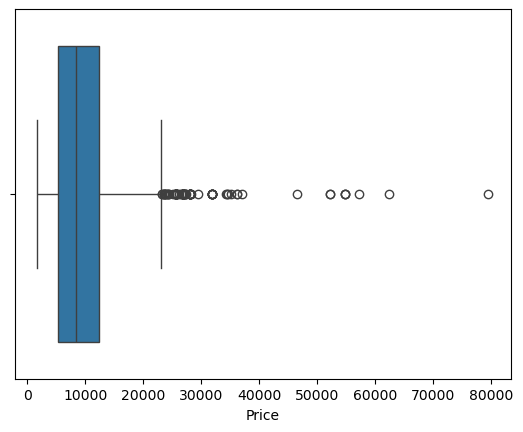

In [54]:
import seaborn as sns
sns.boxplot(x='Price', data=data)

# **Handling Outliers**

In [55]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [56]:
print(maximum)

23017.0


In [57]:
print(minimum)

-5367.0


In [58]:
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

<Axes: xlabel='Price'>

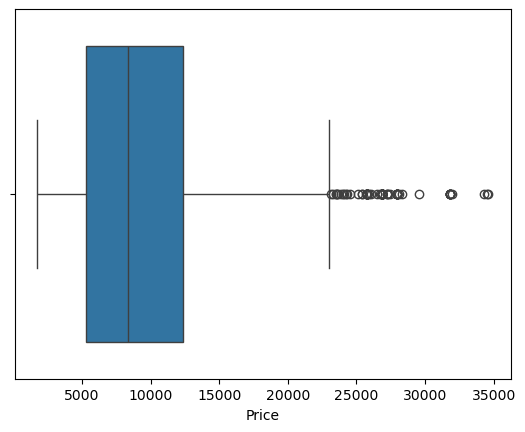

In [59]:
sns.boxplot(x='Price', data=data)

# **Feature Selection**

In [60]:
X=data.drop('Price',axis=1)
y=data['Price']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=1)

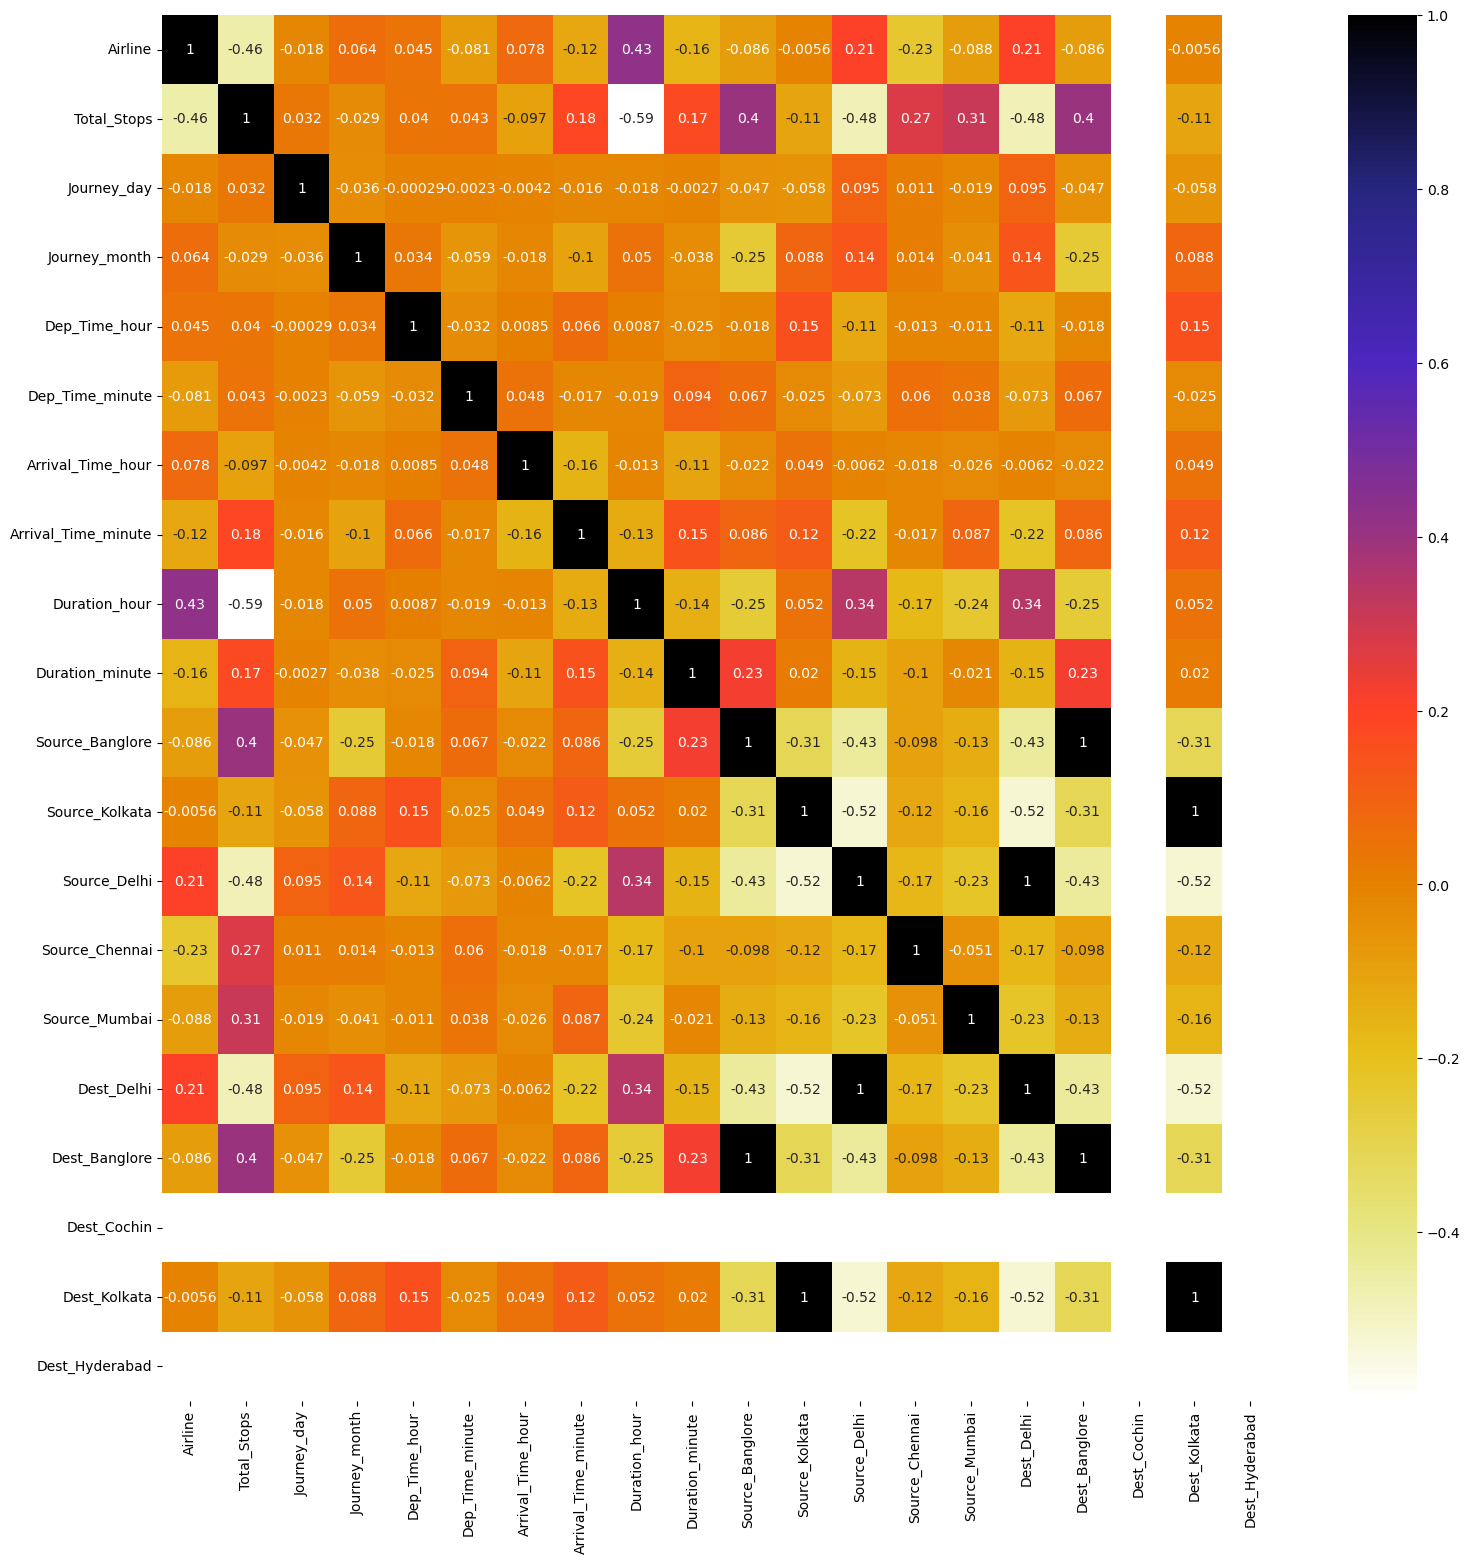

In [63]:
import seaborn as sns
plt.figure(figsize=(18,18))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

### **Correlation Function**

In [64]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [65]:
corr_features=correlation(X_train,0.8)
len(set(corr_features))

3

In [66]:
corr_features

{'Dest_Banglore', 'Dest_Delhi', 'Dest_Kolkata'}

In [67]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Airline,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Dest_Cochin,Dest_Hyderabad
7930,7,4,9,4,21,5,23,55,2,50,1,0,0,0,0,0,0
8033,10,0,6,6,20,25,23,35,3,10,0,1,0,0,0,0,0
8617,10,0,6,6,17,0,23,35,6,35,0,1,0,0,0,0,0
3836,10,0,18,3,22,50,9,0,10,10,1,0,0,0,0,0,0
8636,3,0,27,6,7,35,16,10,8,35,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,3,0,3,3,5,5,10,5,5,0,0,0,1,0,0,0,0
7366,8,0,1,6,18,0,1,30,7,30,0,0,1,0,0,0,0
10357,10,0,21,5,9,35,23,35,14,0,0,1,0,0,0,0,0
1267,8,0,12,6,12,50,1,30,12,40,0,0,1,0,0,0,0


# **Building Model by Linear Regression**

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = regressor.predict(X_test)

In [70]:
from sklearn import metrics
metrics.r2_score(y_test , y_pred)

0.5555740570620573

# **Model building by Polynomial Linear Regression**

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [72]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [73]:
from sklearn import metrics
metrics.r2_score(y_test , y_pred)

0.8672303250232821

# **Model Building using Decision Tree Regressor**

In [74]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train , y_train)

RandomForestRegressor(random_state=0)

In [75]:
y_pred = regressor.predict(X_test)

In [76]:
from sklearn import metrics
metrics.r2_score(y_test , y_pred)

0.8116402003357635

# **Model Building using Random Forest Regressor**

In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train , y_train)

RandomForestRegressor(random_state=0)

In [78]:
y_pred = regressor.predict(X_test)

In [79]:
from sklearn import metrics
metrics.r2_score(y_test , y_pred)

0.8116402003357635

# **Hyperparameter Tuning**

In [259]:
from sklearn.model_selection import RandomizedSearchCV

In [260]:
reg_rf = RandomForestRegressor()

In [261]:
n_estimators = [int(x) for x in np.linspace(start =200 , stop=1200 , num=6)]
max_features = ["auto", "sqrt","log2"]
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]
min_samples_split = [1,2,3,4,5,7,9,10,20,40,50]

In [262]:
random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [263]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [264]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9, 10, 20, 40,
                                                              50],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   verbose=2)

In [265]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'max_features': 'auto',
 'max_depth': 13}

In [266]:
rf_random.best_score_

0.8312660595522163